In [9]:
# use full window width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import os
import numpy as np
os.chdir('..')
import virl
from matplotlib import pyplot as plt

%cd
os.mkdir('linear_aprx_output')
%cd linear_aprx_output
%pwd

C:\Users\chozo
C:\Users\chozo\linear_aprx_output


'C:\\Users\\chozo\\linear_aprx_output'

In [2]:
import pandas as pd
#import display, HTML
from IPython import display


def smooth_plot(all_rewards, smoothed_rewards,title): 
    plt.figure(2, figsize=(12, 6))
    plt.clf()
    plt.title(title)
    plt.xlabel("Epsiode") 
    plt.ylabel("Total Reward")
    plt.plot(all_rewards, '--', alpha=0.5) 
    plt.plot(smoothed_rewards) 
    plt.legend(["Rewards", "Rewards (Smoothed)"]) 
    plt.pause(0.0001)
   # display.clear_output(wait=True)

In [3]:
# Let's import basic tools for defining the function and doing the gradient-based learning
import sklearn.pipeline
import sklearn.preprocessing
#from sklearn.preprocessing import PolynomialFeatures # you can try with polynomial basis if you want (It is difficult!)
from sklearn.linear_model import SGDRegressor # this defines the SGD function
from sklearn.kernel_approximation import RBFSampler # this is the RBF function transformation method
import pandas as pd
#import display, HTML
from IPython import display


def smooth_plot(all_rewards, smoothed_rewards,title): 
    plt.figure(2, figsize=(12, 6))
    plt.clf()
    plt.title(title)
    plt.xlabel("Epsiode") 
    plt.ylabel("Total Reward")
    plt.plot(all_rewards, '--', alpha=0.5) 
    plt.plot(smoothed_rewards) 
    plt.legend(["Rewards", "Rewards (Smoothed)"]) 
    plt.pause(0.0001)
   # display.clear_output(wait=True)

In [4]:
from LinearAprxAgent import LinearAprxAgent

### Training

In [5]:
from plot_helper import plot

C:\Users\chozo
C:\Users\chozo\ai-coursework-group6\notebooks\linear_aprx_output
Decrease Factor: 0.004
Train: problem id 0 


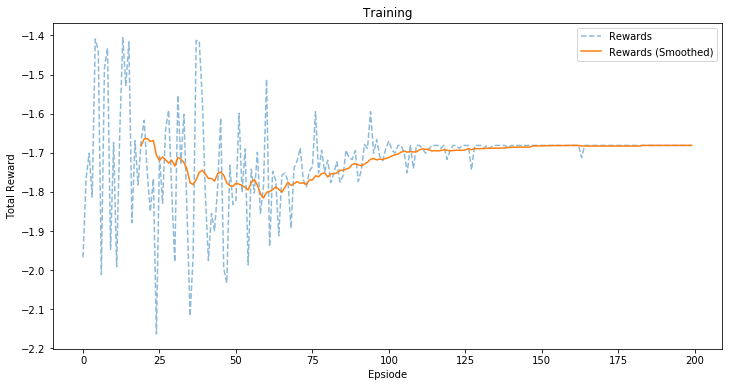

Decrease Factor: 0.004
Train: problem id 1 


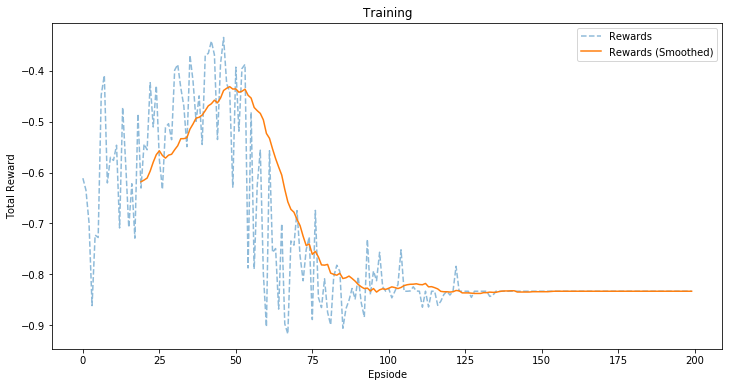

Decrease Factor: 0.004
Train: problem id 2 


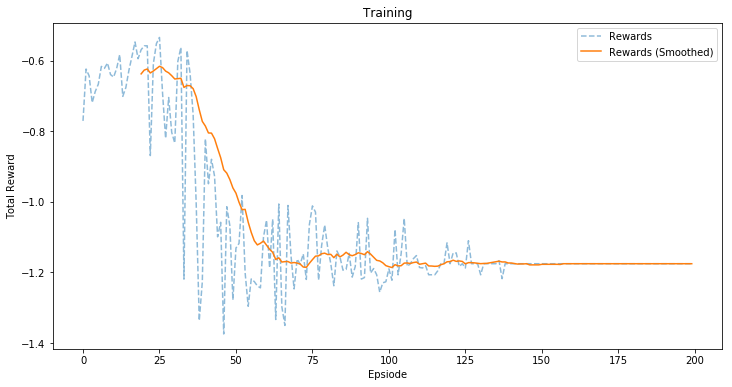

Decrease Factor: 0.004
Train: problem id 3 


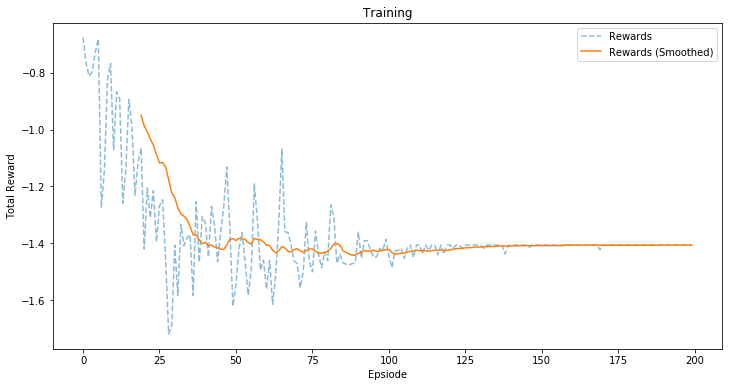

Decrease Factor: 0.004
Train: problem id 4 


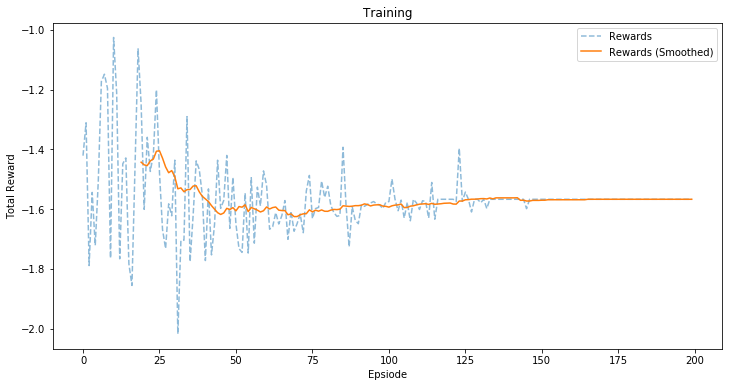

Decrease Factor: 0.004
Train: problem id 5 


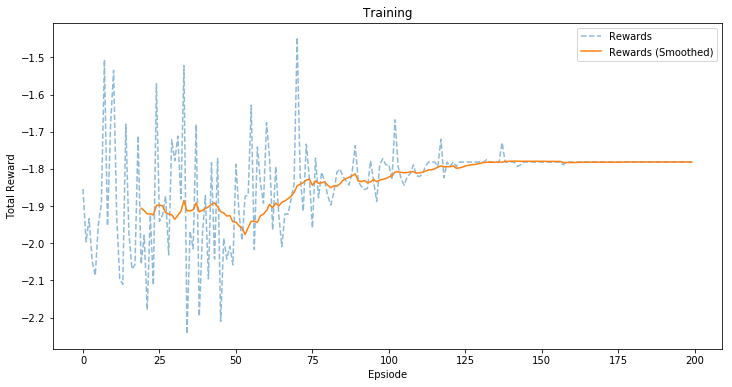

Decrease Factor: 0.004
Train: problem id 6 


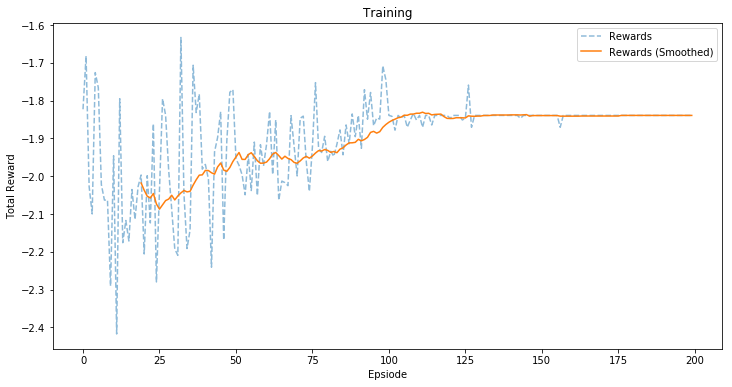

Decrease Factor: 0.004
Train: problem id 7 


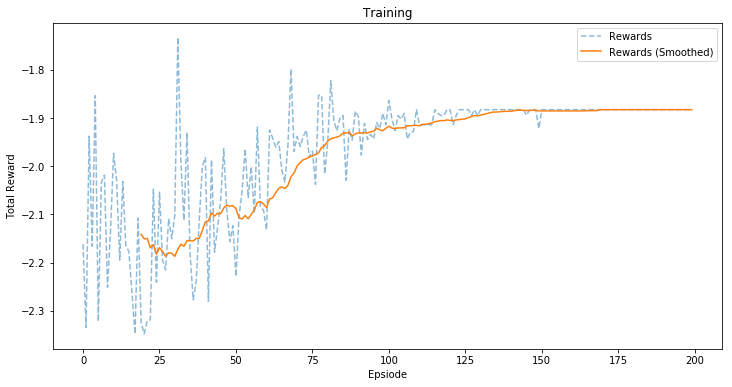

Decrease Factor: 0.004
Train: problem id 8 


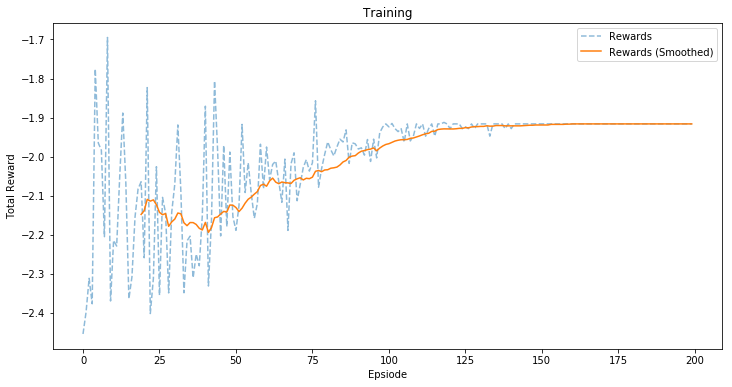

Decrease Factor: 0.004
Train: problem id 9 


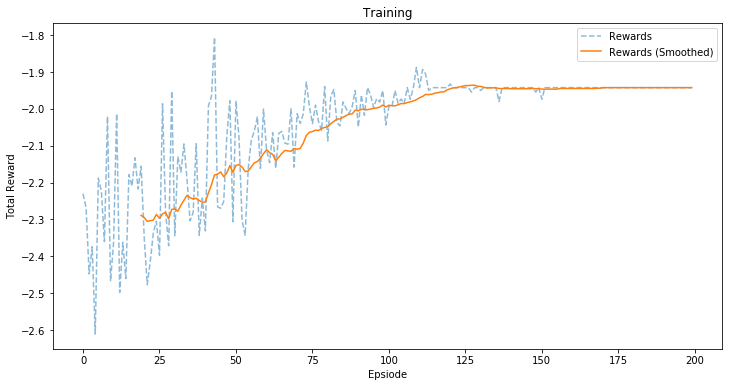

In [6]:
%cd
%cd linear_aprx_output
%pwd

#train on each on problem id
for i in range(0,10):
    env = virl.Epidemic(stochastic=False, noisy=False,problem_id=i)
    agent = LinearAprxAgent(env)

    title = "Train: problem id " + str(i) + " "
    print(title)
    
    states,all_rewards, all_total_rewards,func_approximator, state_transformed, q_value = agent.train()
    intercept = func_approximator.intercept_
    coeff = func_approximator.coef_

    #save for evaluation
    np.savetxt("interceptP" + str(i) + ".csv", intercept, delimiter=",")
    np.savetxt("coeffP" + str(i) + ".csv", coeff, delimiter=",")
    np.savetxt("state_transformedP" + str(i) + ".csv", state_transformed, delimiter=",")
    np.savetxt("q_valueP" + str(i) + ".csv", q_value, delimiter=",")
    np.savetxt("lastRewardP" + str(i) + ".csv", all_rewards[-1], delimiter=",")
    
    


C:\Users\chozo
C:\Users\chozo\ai-coursework-group6\notebooks\linear_aprx_output
stochastic=False, noisy=False
Decrease Factor: 0.004


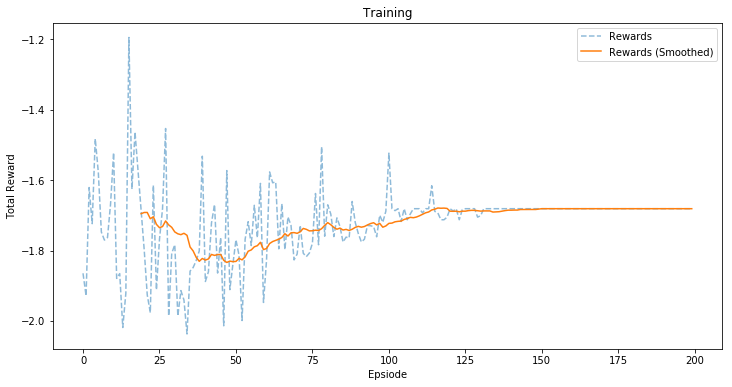

stochastic=True, noisy=False
Decrease Factor: 0.004


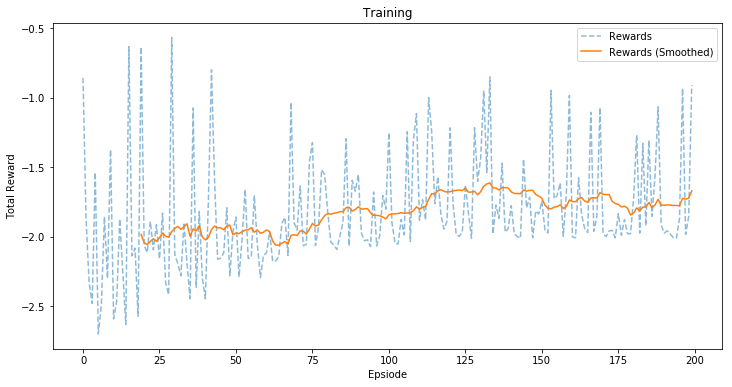

stochastic=False, noisy=True
Decrease Factor: 0.004


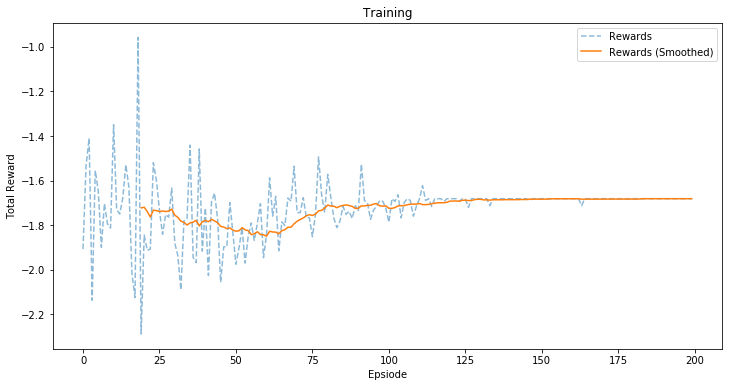

stochastic=True, noisy=True
Decrease Factor: 0.004


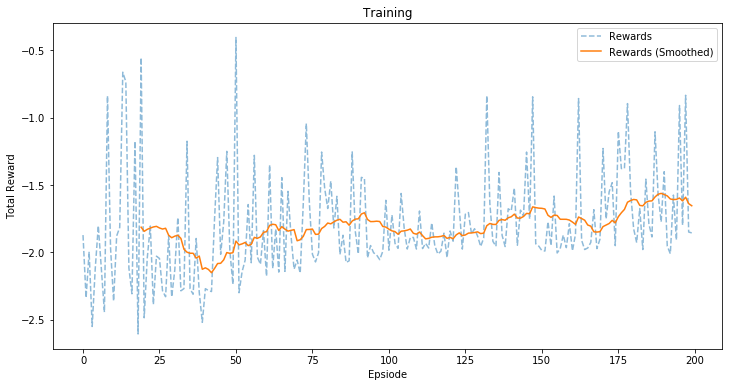

In [7]:
%cd
%cd linear_aprx_output
%pwd

stochastic_noisy = {0:virl.Epidemic(stochastic=False, noisy=False),1:virl.Epidemic(stochastic=True, noisy=False),2:virl.Epidemic(stochastic=False, noisy=True),3:virl.Epidemic(stochastic=True, noisy=True)}
stochastic_noisy_print = {0:"stochastic=False, noisy=False",1:"stochastic=True, noisy=False",2:"stochastic=False, noisy=True",3:"stochastic=True, noisy=True"}

for i in range(0,4):
    
    env = stochastic_noisy[i]
    print(stochastic_noisy_print[i])
    agent = LinearAprxAgent(env)
    
    states,all_rewards, all_total_rewards,func_approximator, state_transformed, q_value = agent.train()
    intercept = func_approximator.intercept_
    coeff = func_approximator.coef_

    #save for evaluation
    np.savetxt("interceptS" + str(i) + ".csv", intercept, delimiter=",")
    np.savetxt("coeffS" + str(i) + ".csv", coeff, delimiter=",")
    np.savetxt("state_transformedS" + str(i) + ".csv", state_transformed, delimiter=",")
    np.savetxt("q_valueS" + str(i) + ".csv", q_value, delimiter=",")
    np.savetxt("lastRewardP" + str(i) + ".csv", all_rewards[-1], delimiter=",")



In [8]:
total_reward_sd = np.std(all_total_rewards)
total_reward_mean = np.mean(all_total_rewards)
reward_sd = np.std(all_rewards)
reward_mean = np.mean(all_rewards)

print("Total reward standard deviation = " + str(total_reward_sd))
print("Total reward mean = " + str(total_reward_mean))
print("Reward standard deviation = " + str(reward_sd))
print("Total reward mean = " + str(reward_mean))

Total reward standard deviation = 0.38600554261089665
Total reward mean = -1.8071116365960314
Reward standard deviation = 0.07318349301944553
Rotal reward mean = -0.03475214685761599
